=== Model Evaluation ===
Accuracy: 0.9

Confusion Matrix:
 [[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



ValueError: cannot reshape array of size 2700 into shape (30,30)

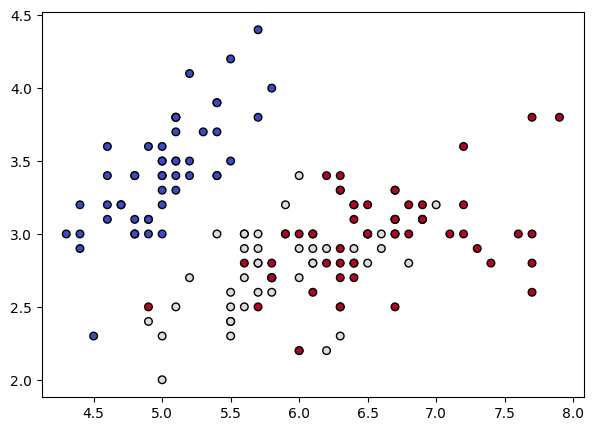

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
iris = datasets.load_iris()
X = iris.data[:, :2]   # Use only first two features for easy visualization
y = iris.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create and train SVM model
model = SVC(kernel='linear', C=1.0)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
print("=== Model Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Function to visualize decision boundary
def plot_svm_decision_boundary(X, y, model):
    plt.figure(figsize=(7,5))
    
    # Plot data points
    plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm', s=30, edgecolors='k')
    
    # Create grid to evaluate model
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    XX, YY = np.meshgrid(xx, yy)   # ✅ Correct order
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)
    
    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1],
               alpha=0.8, linestyles=['--', '-', '--'])
    
    # Highlight support vectors
    ax.scatter(model.support_vectors_[:, 0],
               model.support_vectors_[:, 1],
               s=100, linewidth=1, facecolors='none', edgecolors='k')
    
    plt.title("SVM Decision Boundary and Support Vectors")
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.show()

# Plot boundary
plot_svm_decision_boundary(X, y, model)
